# Task 5


In [1]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras
import os
from google.colab import drive
import numpy as np


TensorFlow 2.x selected.
2.1.0-rc1


In [2]:
drive.mount('/content/drive')
os.listdir()


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


['.config', 'drive', 'sample_data']

In [3]:
base_dir = 'drive/My Drive/Computational Intelligence - MY PROJECT/My_Project_CompInt' 
os.listdir(base_dir)

['OldNotebooks',
 'Task 1',
 'Models',
 'Task4_RelevantPapers',
 'Tensors',
 'Rasla_Davide_505828',
 'Copia di Task 3.1_ INCEPTIONV3.ipynb',
 'Task4.ipynb',
 'Task5.ipynb']

# Data Manipulation 

### Getting data

In [0]:
from tensorflow.keras.utils import to_categorical
def load_training():
  train_images = np.load(os.path.join(base_dir,'Tensors/train_tensor.npy'))
  train_labels = np.load(os.path.join(base_dir,'Tensors/train_labels.npy'))
  test_images = np.load(os.path.join(base_dir,'Tensors/public_test_tensor.npy'))
  test_lables = np.load(os.path.join(base_dir,'Tensors/public_test_labels.npy'))
  return train_images,train_labels, test_images, test_lables
 
train_images, train_labels, test_images, test_lable = load_training()



#### Editing the labels  for all the models

In [5]:
#Here i manage the TEST data set, removing baseline

SubTestLabelArray = np.empty_like(test_lable)
SubTestLabelArray =  np.delete(test_lable, np.s_[::2], 0)
print(SubTestLabelArray[0:1000])
print(SubTestLabelArray.shape)

[2 2 2 2 1 1 2 2 1 2 2 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 2 2 1 1 1 1 2 2 1 1 2 2 2 1 1 1 1 1 1 2 2 2 2 1 1 1 1 1 1 1 2 2 1
 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 2
 2 2 1 1 2 2 2 2 2 1 1 2 2 2 2 1 1 2 2 2 1 1 1 1 1 1 1 1 1 2 2 1 2 2 1 2 1
 1 1 1 2 2 1 1 1 1 1 2 2 2 1 1 2 2 1 2 2 1 1 1 1 2 2 1 1 1 1 1 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 4 4 3 3 3 3 3 3 3 3 3 3 3 4 3 3 4 3 3 3 3 4 4 3 3 3 3
 3 3 4 3 3 3 4 4 4 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 3 3 4 4 3 3 4 4 4 4 4 4
 4 3 3 3 3 4 4 4 3 3 3 3 3 3 4 3 3 3 3 3 3 4 4 4 4 3 3 3 3 4 3 3 4 4 4 3 3
 3 3 3 3 3 3 3 3 3 3 3 4 4 3 3 4 4 4 4 4 4 3 3 4 4 4 4 4 4 4 3 3 3 3 3 3 3
 3 3 3]
(336,)


In [6]:
#Here i modify the label
SubTestLabelArray_Edited = np.zeros_like(SubTestLabelArray)

leng = len(SubTestLabelArray)
masse = 0
calcificazioni = 0

for i in range(leng):
    if SubTestLabelArray[i] == 1 or SubTestLabelArray[i] == 2 :
      SubTestLabelArray_Edited[i] = 0
      masse +=1
    if SubTestLabelArray[i] == 3 or SubTestLabelArray[i] == 4:
      calcificazioni +=1
      SubTestLabelArray_Edited[i] = 1

print(masse)
print(calcificazioni)


179
157


##Modifiyng the test set for 2.1

> Indented block



### Reshape

In [0]:
#reshape per poter fittare la CNN
test_images_2_1 = test_images.reshape((672, 150, 150,1))
test_image_2_1 = test_images_2_1.astype('float32') / 65535


In [8]:
print(test_image_2_1)

[[[[0.6327001 ]
   [0.63430226]
   [0.6320592 ]
   ...
   [0.55672544]
   [0.5605707 ]
   [0.5458152 ]]

  [[0.6272374 ]
   [0.62787825]
   [0.63430226]
   ...
   [0.54998094]
   [0.5503014 ]
   [0.536202  ]]

  [[0.6310979 ]
   [0.63237965]
   [0.64071107]
   ...
   [0.54453343]
   [0.5464561 ]
   [0.5384451 ]]

  ...

  [[0.67757684]
   [0.6772564 ]
   [0.6637827 ]
   ...
   [0.5589685 ]
   [0.5515831 ]
   [0.5416495 ]]

  [[0.6705272 ]
   [0.67180896]
   [0.67180896]
   ...
   [0.5592889 ]
   [0.5612116 ]
   [0.5573663 ]]

  [[0.6705272 ]
   [0.67277026]
   [0.6785382 ]
   ...
   [0.5551232 ]
   [0.5464561 ]
   [0.54998094]]]


 [[[0.6602579 ]
   [0.6692454 ]
   [0.66956586]
   ...
   [0.55190355]
   [0.54677653]
   [0.54613566]]

  [[0.65769434]
   [0.6762951 ]
   [0.6682841 ]
   ...
   [0.5612116 ]
   [0.57082474]
   [0.5737087 ]]

  [[0.65609217]
   [0.6586557 ]
   [0.651606  ]
   ...
   [0.57082474]
   [0.572427  ]
   [0.58716714]]

  ...

  [[0.30667582]
   [0.30955976]
   [0.3

### Deleting BaseLine

In [9]:
#Here i manage the TEST data set, removing baseline
SubTestArray_2_1 =  np.empty_like(test_image_2_1)
SubTestArray_2_1 =  np.delete(test_image_2_1, np.s_[::2], 0)


print(SubTestArray_2_1[0:1000])

[[[[0.6602579 ]
   [0.6692454 ]
   [0.66956586]
   ...
   [0.55190355]
   [0.54677653]
   [0.54613566]]

  [[0.65769434]
   [0.6762951 ]
   [0.6682841 ]
   ...
   [0.5612116 ]
   [0.57082474]
   [0.5737087 ]]

  [[0.65609217]
   [0.6586557 ]
   [0.651606  ]
   ...
   [0.57082474]
   [0.572427  ]
   [0.58716714]]

  ...

  [[0.30667582]
   [0.30955976]
   [0.30667582]
   ...
   [0.37880522]
   [0.38809797]
   [0.4021973 ]]

  [[0.29546043]
   [0.2941787 ]
   [0.30154878]
   ...
   [0.38777754]
   [0.3884184 ]
   [0.40637827]]

  [[0.30218968]
   [0.2993057 ]
   [0.28230718]
   ...
   [0.3842527 ]
   [0.38617533]
   [0.39707026]]]


 [[[0.73783475]
   [0.7442588 ]
   [0.74938583]
   ...
   [0.6230717 ]
   [0.6339818 ]
   [0.6320592 ]]

  [[0.745861  ]
   [0.7413596 ]
   [0.7349508 ]
   ...
   [0.621149  ]
   [0.63974977]
   [0.6310979 ]]

  [[0.7301442 ]
   [0.7317464 ]
   [0.73238724]
   ...
   [0.62883955]
   [0.6320592 ]
   [0.62916   ]]

  ...

  [[0.7615625 ]
   [0.7686122 ]
   [0.7

###Dividing into validation and testset


Shuffle per dividere in validation and test-set

In [0]:
 from sklearn.utils import shuffle

 SubTestArray_shuffle2_1, SubTestLabelArray_shuffle_2_1 = shuffle( SubTestArray_2_1, SubTestLabelArray_Edited, random_state=42)

In [11]:
leng = len(SubTestLabelArray_shuffle_2_1)
masse = 0
calcificazioni = 0
halfLeng = int(leng/2)

for i in range(leng):
    if SubTestLabelArray_shuffle_2_1[i] == 0 :
      masse +=1
    if SubTestLabelArray_shuffle_2_1[i] == 1 :
      calcificazioni +=1

print(masse)
print(calcificazioni)

masse = 0
calcificazioni = 0
halfLeng = int(leng/2)

for i in range(halfLeng):
    if SubTestLabelArray_shuffle_2_1[i] == 0 :
      masse +=1
    if SubTestLabelArray_shuffle_2_1[i] == 1 :
      calcificazioni +=1

print(masse)
print(calcificazioni)

179
157
92
76


In [0]:
Validation_labels_2_1 =  SubTestLabelArray_shuffle_2_1[0: 168]
Test_Labels_2_1 = SubTestLabelArray_shuffle_2_1[169:]

#divido test-set

Validation_DATA_2_1 =  SubTestArray_shuffle2_1[0: 168]
Test_DATA_2_1 = SubTestArray_shuffle2_1[169:]

In [13]:
print(Test_Labels_2_1)

[0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0
 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 1 1
 1 0 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 0 0 1 1 0 1 0
 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0]


## Modifiyng the test set for 3.1 - VGG

### Reshape

In [0]:
test_images_3_1_VGG = test_images.reshape((672, 150, 150,1))
test_images_3_1_VGG = test_images_3_1_VGG.astype('float32') / 65535


In [15]:
print(test_images_3_1_VGG)

[[[[0.6327001 ]
   [0.63430226]
   [0.6320592 ]
   ...
   [0.55672544]
   [0.5605707 ]
   [0.5458152 ]]

  [[0.6272374 ]
   [0.62787825]
   [0.63430226]
   ...
   [0.54998094]
   [0.5503014 ]
   [0.536202  ]]

  [[0.6310979 ]
   [0.63237965]
   [0.64071107]
   ...
   [0.54453343]
   [0.5464561 ]
   [0.5384451 ]]

  ...

  [[0.67757684]
   [0.6772564 ]
   [0.6637827 ]
   ...
   [0.5589685 ]
   [0.5515831 ]
   [0.5416495 ]]

  [[0.6705272 ]
   [0.67180896]
   [0.67180896]
   ...
   [0.5592889 ]
   [0.5612116 ]
   [0.5573663 ]]

  [[0.6705272 ]
   [0.67277026]
   [0.6785382 ]
   ...
   [0.5551232 ]
   [0.5464561 ]
   [0.54998094]]]


 [[[0.6602579 ]
   [0.6692454 ]
   [0.66956586]
   ...
   [0.55190355]
   [0.54677653]
   [0.54613566]]

  [[0.65769434]
   [0.6762951 ]
   [0.6682841 ]
   ...
   [0.5612116 ]
   [0.57082474]
   [0.5737087 ]]

  [[0.65609217]
   [0.6586557 ]
   [0.651606  ]
   ...
   [0.57082474]
   [0.572427  ]
   [0.58716714]]

  ...

  [[0.30667582]
   [0.30955976]
   [0.3

In [16]:
#adding channels
#b = tf.zeros([672,150, 150, 1])
b = test_images_3_1_VGG
c = tf.concat([test_images_3_1_VGG, b], axis=3)
RGB_test_images_toResize = tf.concat([c, b], axis=3)
RGB_test_images_VGG = tf.image.resize(RGB_test_images_toResize, ( 224, 224))
print(RGB_test_images_VGG[0])

tf.Tensor(
[[[0.6327001  0.6327001  0.6327001 ]
  [0.6335083  0.6335083  0.6335083 ]
  [0.6339117  0.6339117  0.6339117 ]
  ...
  [0.55990124 0.55990124 0.55990124]
  [0.5532587  0.5532587  0.5532587 ]
  [0.5458152  0.5458152  0.5458152 ]]

 [[0.6299443  0.6299443  0.6299443 ]
  [0.63050795 0.63050795 0.63050795]
  [0.6314323  0.6314323  0.6314323 ]
  ...
  [0.5550303  0.5550303  0.5550303 ]
  [0.5482422  0.5482422  0.5482422 ]
  [0.5409657  0.5409657  0.5409657 ]]

 [[0.62790954 0.62790954 0.62790954]
  [0.6282891  0.6282891  0.6282891 ]
  [0.6298383  0.6298383  0.6298383 ]
  ...
  [0.5495275  0.5495275  0.5495275 ]
  [0.54317033 0.54317033 0.54317033]
  [0.53659254 0.53659254 0.53659254]]

 ...

 [[0.6717546  0.6717546  0.6717546 ]
  [0.67226046 0.67226046 0.67226046]
  [0.672349   0.672349   0.672349  ]
  ...
  [0.55948263 0.55948263 0.55948263]
  [0.55710447 0.55710447 0.55710447]
  [0.55463    0.55463    0.55463   ]]

 [[0.6705272  0.6705272  0.6705272 ]
  [0.67141414 0.67141414 0

### Deleting BaseLine

In [17]:
#Here i manage the TEST data set, removing baseline
SubTestArray_3_1_VGG =  np.empty_like(RGB_test_images_VGG)
SubTestArray_3_1_VGG =  np.delete(RGB_test_images_VGG, np.s_[::2], 0)

print(SubTestArray_3_1_VGG.shape)

(336, 224, 224, 3)


###Dividing into validation and testset


Shuffle per dividere in validation and test-set

In [0]:
 from sklearn.utils import shuffle

 SubTestArray_shuffle3_1_VGG, SubTestLabelArray_shuffle_3_1_VGG = shuffle( SubTestArray_3_1_VGG, SubTestLabelArray_Edited, random_state=42)

In [19]:
leng = len(SubTestLabelArray_shuffle_2_1)
masse = 0
calcificazioni = 0
halfLeng = int(leng/2)

for i in range(leng):
    if SubTestLabelArray_shuffle_3_1_VGG[i] == 0 :
      masse +=1
    if SubTestLabelArray_shuffle_3_1_VGG[i] == 1 :
      calcificazioni +=1

print(masse)
print(calcificazioni)

masse = 0
calcificazioni = 0
halfLeng = int(leng/2)

for i in range(halfLeng):
    if SubTestLabelArray_shuffle_3_1_VGG[i] == 0 :
      masse +=1
    if SubTestLabelArray_shuffle_3_1_VGG[i] == 1 :
      calcificazioni +=1

print(masse)
print(calcificazioni)

179
157
92
76


In [0]:
Validation_labels_VGG =  SubTestLabelArray_shuffle_3_1_VGG[0: 168]
Test_Labels_VGG = SubTestLabelArray_shuffle_3_1_VGG[169:]

#divido test-set

Validation_DATA_VGG =  SubTestArray_shuffle3_1_VGG[0: 168]
Test_DATA_VGG = SubTestArray_shuffle3_1_VGG[169:]


## Modifiyng the test set - INCEPTION

In [21]:
test_images_3_1_INCEPTION = test_images.reshape((672, 150, 150,1))
test_images_3_1_INCEPTION = test_images_3_1_INCEPTION.astype('float32') / 65535

#adding channels
#b = tf.zeros([672,150, 150, 1])
b = test_images_3_1_INCEPTION
c = tf.concat([test_images_3_1_INCEPTION, b], axis=3)
RGB_test_images_toResize = tf.concat([c, b], axis=3)
RGB_test_images_INCEPTION = tf.image.resize(RGB_test_images_toResize, ( 299, 299))
print(RGB_test_images_INCEPTION[0])


tf.Tensor(
[[[0.6327001  0.6327001  0.6327001 ]
  [0.6331046  0.6331046  0.6331046 ]
  [0.6339084  0.6339084  0.6339084 ]
  ...
  [0.5569433  0.5569433  0.5569433 ]
  [0.549541   0.549541   0.549541  ]
  [0.5458152  0.5458152  0.5458152 ]]

 [[0.6313207  0.6313207  0.6313207 ]
  [0.631664   0.631664   0.631664  ]
  [0.632346   0.632346   0.632346  ]
  ...
  [0.5543909  0.5543909  0.5543909 ]
  [0.54707175 0.54707175 0.54707175]
  [0.54338783 0.54338783 0.54338783]]

 [[0.6285802  0.6285802  0.6285802 ]
  [0.6288017  0.6288017  0.6288017 ]
  [0.62924176 0.62924176 0.62924176]
  ...
  [0.54932    0.54932    0.54932   ]
  [0.542166   0.542166   0.542166  ]
  [0.5385651  0.5385651  0.5385651 ]]

 ...

 [[0.6705272  0.6705272  0.6705272 ]
  [0.67091054 0.67091054 0.67091054]
  [0.6716721  0.6716721  0.6716721 ]
  ...
  [0.55708426 0.55708426 0.55708426]
  [0.5560642  0.5560642  0.5560642 ]
  [0.55555075 0.55555075 0.55555075]]

 [[0.6705272  0.6705272  0.6705272 ]
  [0.6710323  0.6710323  0

### Deleting BaseLine

In [22]:
#Here i manage the TEST data set, removing baseline
SubTestArray_INCEPTION =  np.empty_like(RGB_test_images_INCEPTION)
SubTestArray_INCEPTION =  np.delete(RGB_test_images_INCEPTION, np.s_[::2], 0)


print(SubTestArray_INCEPTION[0:1000])
print(SubTestArray_INCEPTION.shape)

[[[[0.6602579  0.6602579  0.6602579 ]
   [0.6625273  0.6625273  0.6625273 ]
   [0.6670361  0.6670361  0.6670361 ]
   ...
   [0.546619   0.546619   0.546619  ]
   [0.5462975  0.5462975  0.5462975 ]
   [0.54613566 0.54613566 0.54613566]]

  [[0.65961057 0.65961057 0.65961057]
   [0.66249293 0.66249293 0.66249293]
   [0.6682195  0.6682195  0.6682195 ]
   ...
   [0.5529102  0.5529102  0.5529102 ]
   [0.5530352  0.5530352  0.5530352 ]
   [0.5530981  0.5530981  0.5530981 ]]

  [[0.6583245  0.6583245  0.6583245 ]
   [0.6624246  0.6624246  0.6624246 ]
   [0.6705706  0.6705706  0.6705706 ]
   ...
   [0.56540924 0.56540924 0.56540924]
   [0.56642133 0.56642133 0.56642133]
   [0.5669307  0.5669307  0.5669307 ]]

  ...

  [[0.2971147  0.2971147  0.2971147 ]
   [0.2966916  0.2966916  0.2966916 ]
   [0.295851   0.295851   0.295851  ]
   ...
   [0.39185518 0.39185518 0.39185518]
   [0.3999937  0.3999937  0.3999937 ]
   [0.40409005 0.40409005 0.40409005]]

  [[0.30049053 0.30049053 0.30049053]
   [0.2

###Dividing into validation and testset


Shuffle per dividere in validation and test-set

In [0]:
 from sklearn.utils import shuffle

 SubTestArray_shuffle3_1_INCEPTION, SubTestLabelArray_shuffle_3_1_INCEPTION = shuffle( SubTestArray_INCEPTION, SubTestLabelArray_Edited, random_state=42)

In [24]:
leng = len(SubTestLabelArray_shuffle_2_1)
masse = 0
calcificazioni = 0
halfLeng = int(leng/2)

for i in range(leng):
    if SubTestLabelArray_shuffle_3_1_INCEPTION[i] == 0 :
      masse +=1
    if SubTestLabelArray_shuffle_3_1_INCEPTION[i] == 1 :
      calcificazioni +=1

print(masse)
print(calcificazioni)

masse = 0
calcificazioni = 0
halfLeng = int(leng/2)

for i in range(halfLeng):
    if SubTestLabelArray_shuffle_3_1_INCEPTION[i] == 0 :
      masse +=1
    if SubTestLabelArray_shuffle_3_1_INCEPTION[i] == 1 :
      calcificazioni +=1

print(masse)
print(calcificazioni)

179
157
92
76


Divido le lable 

In [0]:
Validation_labels_INCEPTION =  SubTestLabelArray_shuffle_3_1_INCEPTION[0: 168]
Test_Labels_INCEPTION = SubTestLabelArray_shuffle_3_1_INCEPTION[169:]

#divido test-set

Validation_DATA_INCEPTION =  SubTestArray_shuffle3_1_INCEPTION[0: 168]
Test_DATA_INCEPTION = SubTestArray_shuffle3_1_INCEPTION[169:]




# Loading models for binary classificaition 


In [0]:
#Restore the saved model

model_2_1 = tf.keras.models.load_model(os.path.join(base_dir,'Models/Model_Task_2.1_WithAugmentatin_Definitivo_0.875.h5'))
model_2_1_DCCN = tf.keras.models.load_model(os.path.join(base_dir,'Models/Model_Task_2.1_DCCNN_Augmentaton_0.9017.h5'))
model_3_1_VGG = tf.keras.models.load_model(os.path.join(base_dir,'Models/Model_Task_3.1_VGG16_Definivo_WithAugmentation_LOWRATE__0.9017.h5'))

model_3_1_INCEPTION = tf.keras.models.load_model(os.path.join(base_dir,'Models/Model_Task_3.1_Inception_WithAugmentatin_Definitivo_0.9137.h5'))




# Tuning of weights of ensemblig basing on validation set

In [137]:
#prediction and evalutation for 2.1
preds_a=model_2_1.predict(Validation_DATA_2_1, verbose= 1)
model_2_1.evaluate(Validation_DATA_2_1,Validation_labels_2_1)

#prediction and evalutation for 2.1 DCCN
preds_b=model_2_1_DCCN.predict(Validation_DATA_2_1, verbose= 1)
model_2_1_DCCN.evaluate(Validation_DATA_2_1,Validation_labels_2_1)

#prediction and evalutation for 3.1 VGG
preds_c=model_3_1_VGG.predict(Validation_DATA_VGG, verbose= 1)
model_3_1_VGG.evaluate(Validation_DATA_VGG,Validation_labels_VGG)

#prediction and evalutation for 3.1 INCEPTION
preds_d=model_3_1_INCEPTION.predict(Validation_DATA_INCEPTION, verbose= 1)
model_3_1_INCEPTION.evaluate(Validation_DATA_INCEPTION,Validation_labels_INCEPTION)
 


168/168 [==============================] - 0s 3ms/sample - loss: 0.2398 - binary_accuracy: 0.9405


[0.23977410935220264, 0.9404762]

In [0]:
import random;

def SumOfRandom():
  a = random.uniform(0, 1)
  b = random.uniform(0,1-a)
  c = random.uniform(0,1-a -b)
  d =  1 - a -b -c
  return a,b,c,d;

i = 0

while i == 0:
    correct = 0
    incorrect = 0
    a,b,c,d = SumOfRandom()

    final_preds = (b*preds_a + c*preds_b + a*preds_c + d*preds_d )
    final_preds_int = np.empty_like(final_preds)
    for i in range(len(final_preds)):
        if final_preds[i]< 0.5:
          final_preds_int[i] = 0
        else:
          final_preds_int[i] = 1

    for i in range(len(final_preds_int)):
        if (final_preds_int[i] - Validation_labels_INCEPTION[i]) == 0:
          correct = correct +1
        else:
          incorrect = incorrect + 1
    #print('Errati:' ,incorrect)
    if incorrect < 9:
      print('caso0')
      print('Errati:' ,incorrect)
      i = 1
    else:
      final_preds = (d*preds_a + b*preds_b + a*preds_c + c*preds_d )
      final_preds_int = np.empty_like(final_preds)
      for i in range(len(final_preds)):
          if final_preds[i]< 0.5:
            final_preds_int[i] = 0
          else:
            final_preds_int[i] = 1
      correct = 0
      incorrect = 0
      for i in range(len(final_preds)):
          if (final_preds_int[i] - Validation_labels_INCEPTION[i]) == 0:
            correct = correct +1
          else:
            incorrect = incorrect + 1
      #print('Errati:' ,incorrect)
      if incorrect < 9:
        print('caso2')
        print('Errati:' ,incorrect)
        i = 1
      else:
        final_preds = (d*preds_a + a*preds_b + b*preds_c + c*preds_d )
        final_preds_int = np.empty_like(final_preds)
        for i in range(len(final_preds)):
            if final_preds[i]< 0.5:
              final_preds_int[i] = 0
            else:
              final_preds_int[i] = 1
        correct = 0
        incorrect = 0
        for i in range(len(final_preds_int)):
            if (final_preds_int[i] - Validation_labels_INCEPTION[i]) == 0:
              correct = correct +1
            else:
              incorrect = incorrect + 1
        #print('Errati:' ,incorrect)
        if incorrect < 9:
          print('caso3')
          print('Errati:' ,incorrect)
          i = 1
        else:
          final_preds = (b*preds_a + a*preds_b + c*preds_c + d*preds_d )
          final_preds_int = np.empty_like(final_preds)
          for i in range(len(final_preds)):
              if final_preds[i]< 0.5:
                final_preds_int[i] = 0
              else:
                final_preds_int[i] = 1
          correct = 0
          incorrect = 0
          for i in range(len(final_preds_int)):
              if (final_preds_int[i] - Validation_labels_INCEPTION[i]) == 0:
                correct = correct +1
              else:
                incorrect = incorrect + 1
          #print('Errati:' ,incorrect)
          if incorrect < 9:
            print('caso4')
            print('Errati:' ,incorrect)
            i = 1
          else:
            final_preds = (c*preds_a + b*preds_b + a*preds_c + d*preds_d )
            final_preds_int = np.empty_like(final_preds)
            for i in range(len(final_preds)):
                if final_preds[i]< 0.5:
                  final_preds_int[i] = 0
                else:
                  final_preds_int[i] = 1
            correct = 0
            incorrect = 0
            for i in range(len(final_preds_int)):
                if (final_preds_int[i] - Validation_labels_INCEPTION[i]) == 0:
                  correct = correct +1
                else:
                  incorrect = incorrect + 1
            #print('Errati:' ,incorrect)
            if incorrect < 9:
              print('caso5')
              print('Errati:' ,incorrect)
              i = 1
            else:
              final_preds = (b*preds_a + d*preds_b + a*preds_c + c*preds_d )
              final_preds_int = np.empty_like(final_preds)
              for i in range(len(final_preds)):
                  if final_preds[i]< 0.5:
                    final_preds_int[i] = 0
                  else:
                    final_preds_int[i] = 1
              correct = 0
              incorrect = 0
              for i in range(len(final_preds_int)):
                  if (final_preds_int[i] - Validation_labels_INCEPTION[i]) == 0:
                    correct = correct +1
                  else:
                    incorrect = incorrect + 1
              #print('Errati:' ,incorrect)
              if incorrect < 9:
                print('caso6')
                print('Errati:' ,incorrect)
                i = 1
              else:
                final_preds = (b*preds_a + d*preds_b + c*preds_c + a*preds_d )
                final_preds_int = np.empty_like(final_preds)
                for i in range(len(final_preds)):
                    if final_preds[i]< 0.5:
                      final_preds_int[i] = 0
                    else:
                      final_preds_int[i] = 1
                correct = 0
                incorrect = 0
                for i in range(len(final_preds_int)):
                    if (final_preds_int[i] - Validation_labels_INCEPTION[i]) == 0:
                      correct = correct +1
                    else:
                      incorrect = incorrect + 1
                #print('Errati:' ,incorrect)
                if incorrect < 9:
                  print('caso7')
                  print('Errati:' ,incorrect)
                  i = 1
                else:
                  final_preds = (d*preds_a + a*preds_b + c*preds_c + b*preds_d )
                  final_preds_int = np.empty_like(final_preds)
                  for i in range(len(final_preds)):
                      if final_preds[i]< 0.5:
                        final_preds_int[i] = 0
                      else:
                        final_preds_int[i] = 1
                  correct = 0
                  incorrect = 0
                  for i in range(len(final_preds_int)):
                      if (final_preds_int[i] - Validation_labels_INCEPTION[i]) == 0:
                        correct = correct +1
                      else:
                        incorrect = incorrect + 1
                 # print('Errati:' ,incorrect)
                  if incorrect < 9:
                    print('caso8')
                    print('Errati:' ,incorrect)
                    i = 1
                  else:
                    i = 0

print('Weights are:')
print(a)
print(b)
print(c)
print(d)

## Evaluation on validation set of test set

In [139]:



a = 0.28235936094800096
b = 0.25077918203434496
c = 0.1581059860858597
d = 0.30875547093179434


correct = 0
incorrect = 0 
final_preds = (d*preds_a + a*preds_b + b*preds_c + c*preds_d )
#print('Media finale')
final_preds_int = np.empty_like(final_preds)
for i in range(len(final_preds)):
    if final_preds[i]< 0.5:
      final_preds_int[i] = 0
    else:
      final_preds_int[i] = 1

#print('Statistiche ')

for i in range(len(final_preds_int)):
    if (final_preds_int[i] == Validation_labels_INCEPTION[i]) :
      correct = correct +1
    else:
      incorrect = incorrect + 1

print('Corretti:' ,correct)
print('Percentuale corretti',(correct/len(Validation_labels_INCEPTION))*100 )
print('Errati:' ,incorrect)
print('Percentuale scorretti',(incorrect/len(Validation_labels_INCEPTION))*100 )



Corretti: 158
Percentuale corretti 94.04761904761905
Errati: 10
Percentuale scorretti 5.952380952380952


# Evaluation on test-set


In [124]:
#prediction and evalutation for 2.1
preds_a=model_2_1.predict(Test_DATA_2_1, verbose= 1)
model_2_1.evaluate(Test_DATA_2_1,Test_Labels_2_1)

#prediction and evalutation for 2.1 DCCN
preds_b=model_2_1_DCCN.predict(Test_DATA_2_1, verbose= 1)
model_2_1_DCCN.evaluate(Test_DATA_2_1,Test_Labels_2_1)

#prediction and evalutation for 3.1 VGG
preds_c=model_3_1_VGG.predict(Test_DATA_VGG, verbose= 1)
model_3_1_VGG.evaluate(Test_DATA_VGG,Test_Labels_VGG)

#prediction and evalutation for 3.1 INCEPTION
preds_d=model_3_1_INCEPTION.predict(Test_DATA_INCEPTION, verbose= 1)
model_3_1_INCEPTION.evaluate(Test_DATA_INCEPTION,Test_Labels_INCEPTION)
 


167/167 [==============================] - 1s 3ms/sample - loss: 0.2927 - binary_accuracy: 0.8862


[0.29271471679411426, 0.88622755]

In [136]:


a = 0.28235936094800096
b = 0.25077918203434496
c = 0.1581059860858597
d = 0.30875547093179434


correct = 0
incorrect = 0 
final_preds = (d*preds_a +a*preds_b + b*preds_c + c*preds_d )
#print('Media finale')
final_preds_int = np.empty_like(final_preds)
for i in range(len(final_preds)):
    if final_preds[i]< 0.5:
      final_preds_int[i] = 0
    else:
      final_preds_int[i] = 1
#print(final_preds_int)
#print('Statistiche ')

for i in range(len(final_preds_int)):
    if (final_preds_int[i] - Test_Labels_INCEPTION[i]) == 0:
      correct = correct +1
    else:
      incorrect = incorrect + 1

print('Corretti:' ,correct)
print('Percentuale corretti',(correct/len(Test_Labels_INCEPTION))*100 )
print('Errati:' ,incorrect)
print('Percentuale scorretti',(incorrect/len(Test_Labels_INCEPTION))*100 )



Corretti: 154
Percentuale corretti 92.21556886227546
Errati: 13
Percentuale scorretti 7.784431137724551


# Confusion matrix and ROC 

In [0]:
from sklearn import metrics

In [127]:
# confusion matrix: 
#     on each row: true class
#     on each column: predicted class
metrics.confusion_matrix(Test_Labels_INCEPTION,final_preds_int)


array([[80,  7],
       [ 6, 74]])

In [128]:
metrics.accuracy_score(Test_Labels_INCEPTION,final_preds_int)

0.9221556886227545

In [129]:
metrics.precision_score(Test_Labels_INCEPTION,final_preds_int)

0.9135802469135802

In [130]:
# recall: TP/(TP+FN): The recall is intuitively the ability of the classifier to find all the positive samples.
metrics.recall_score(Test_Labels_INCEPTION,final_preds_int)

0.925

In [131]:
# f1-score: 2*(precision*recall)/(precision + recall). The F1-score is the harmonic mean of precision and sensitivity
metrics.f1_score(Test_Labels_INCEPTION,final_preds_int)

0.9192546583850932

In [132]:
# classification report: Build a text report showing the main classification metrics
print(metrics.classification_report(Test_Labels_INCEPTION,final_preds_int))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92        87
           1       0.91      0.93      0.92        80

    accuracy                           0.92       167
   macro avg       0.92      0.92      0.92       167
weighted avg       0.92      0.92      0.92       167



In [0]:

np.min(final_preds),np.max(final_preds)

In [0]:
fpr,tpr,th = metrics.roc_curve(Test_Labels_INCEPTION,final_preds_int)
# Sensitivty = TPR(True Positive Rate)= Recall = TP/(TP+FN)
# (1 - Specificity) = FPR(False Positive Rate)= FP/(TN+FP)

roc_auc = metrics.roc_auc_score(Test_Labels_INCEPTION,final_preds_int)

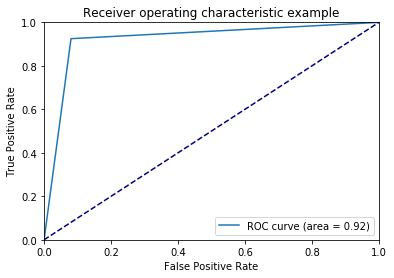

In [134]:
from matplotlib import pyplot as plt
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()